### Agents

These agents are designed to act autonomously, making decisions about which actions to take, which tools to use, and how to process information.

- Core Role: An agent is typically responsible for using **tools** to gather data, process information, and generate outputs based on the user's request.
- Interaction with Tools: The agent can leverage a variety of tools that it has access to. These tools could be external APIs, databases, files, or any resource that can provide data to help the agent accomplish a goal.
- Decision-Making: Based on the user's prompt or the task at hand, the agent decides which tool to use, how to combine information, and how to interpret the results. This decision-making process can be driven by a set of predefined rules or more complex reasoning capabilities built into the agent.

For example, if you ask an agent, "What's the weather today?" it can use a browsing tool to check the latest weather data, then give you the answer. Agents are like smart assistants that use both language understanding and extra tools to help you with a range of tasks.

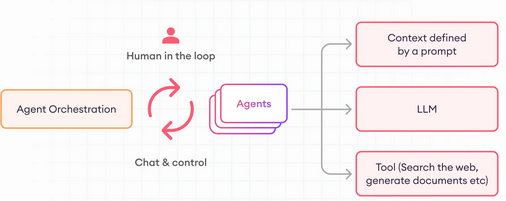

### ReAct Agent

https://docs.llamaindex.ai/en/stable/examples/agent/react_agent/


In [1]:
!pip install --force-reinstall llama-index==0.11.3 llama-index-llms-groq==0.2.0

  Using cached llama_index_indices_managed_llama_cloud-0.6.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached llama_index_legacy-0.9.48.post4-py3-none-any.whl.metadata (8.5 kB)
  Using cached llama_index_readers_llama_parse-0.4.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached dirtyjson-1.0.8-py3-none-any.whl.metadata (11 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 10.6 MB/s eta 0:00:00
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached tiktoken-0.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.6 MB/s eta 0:00:00
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached llama_cloud-0.1.6-py3-none-

In [1]:
!pip install -q llama-index-embeddings-huggingface llama-index-readers-web

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.9 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but you have async-timeout 5.0.1 which is incompatible.
llama-index 0.11.3 requires llama-index-core<0.12.0,>=0.11.3, but you have llama-index-core 0.12.3 which is incompatible.
llama-index-agent-openai 0.3.4 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.3 which is incompatible.
llama-index-cli 0.3.1 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.3 which is incompatible.
llama-index-embeddings-openai 0.2.5 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.3 which is incompatible.
llama-index-indices-managed-llama-cloud 0.6.0 requires llama-index-core<0.12.0,>=0.11.13.post1, but you have llama-index-core 0.12.3 which is incompatible.
llama-index-ll

In [2]:
from llama_index.core.agent import ReActAgent
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

from llama_index.llms.groq import Groq

In [3]:
from llama_index.core.tools import BaseTool, FunctionTool

In [4]:
llm = Groq(model="llama3-70b-8192", api_key=GROQ_API_KEY, context_window=2000)

def multiply(a: int, b: int) -> int:
    """Multiply two integers and returns the result integer"""
    return a * b


multiply_tool = FunctionTool.from_defaults(fn=multiply)

def add(a: int, b: int) -> int:
    """Add two integers and returns the result integer"""
    return a + b


add_tool = FunctionTool.from_defaults(fn=add)


agent = ReActAgent.from_tools([multiply_tool, add_tool], llm=llm, verbose=True)

In [5]:
response = agent.chat("What is 5+6*10-1? Calculate step by step ")

> Running step 6dff0c6d-47c9-45f1-8538-3c8d10825776. Step input: What is 5+6*10-1? Calculate step by step 
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.

To calculate the expression 5+6*10-1, I'll break it down into steps. First, I'll calculate the multiplication.
Action: multiply
Action Input: {'a': 6, 'b': 10}
Observation: 60
> Running step f4dd8419-c62b-477c-8003-387859379dc9. Step input: None
Thought: Now that I have the result of the multiplication, I'll add 5 to it.
Action: add
Action Input: {'a': 5, 'b': 60}
Observation: 65
> Running step 721c60fd-b760-40df-9b13-444cc0fdaf54. Step input: None
Thought: Now that I have the result of the addition, I'll subtract 1 from it.
Action: add
Action Input: {'a': 65, 'b': -1}
Observation: 64
> Running step 8f1ed62f-7ced-4a4f-82b6-334bb591ec54. Step input: None
Thought: I can answer without using any more tools. I'll use the user's language to answer
Answer: The result of the expre

In [ ]:
# prompt_dict = agent.get_prompts()
# for k, v in prompt_dict.items():
#     print(f"Prompt: {k}\n\nValue: {v.template}")

### Add query engine as a tool

In [ ]:
from llama_index.readers.web import SimpleWebPageReader

# Load data
web_reader_obj = SimpleWebPageReader(html_to_text=True,)
documents = web_reader_obj.load_data(
    urls = ["https://indianexpress.com/section/political-pulse/",
            "https://indianexpress.com/section/technology/",
            "https://indianexpress.com/section/entertainment/"])


In [ ]:
from llama_index.core import VectorStoreIndex

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

# load the embedding model from hugging face
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

index = VectorStoreIndex.from_documents(
    documents,
    llm=llm,
    embed_model=embed_model,
    chunk_size=512,
    chunk_overlap=50
    )


In [ ]:
query_engine = index.as_query_engine(llm=llm, embed_model=embed_model)

In [ ]:
from llama_index.core.tools import QueryEngineTool, ToolMetadata

In [ ]:
news_tool = QueryEngineTool(
        query_engine=query_engine,
        metadata=ToolMetadata(
            name="news",
            description=(
                "Provides information about the latest news related to Politics, Entertainment and sports"
                "Pass the input natural language text"
            ),
        ),
    )

In [ ]:
agent = ReActAgent.from_tools([news_tool], llm=llm, verbose=True)

response = agent.chat("Tell me about movies")

### Combining tools

In [ ]:
agent = ReActAgent.from_tools([multiply_tool, add_tool, news_tool], llm=llm, verbose=True, max_iterations=3)

response = agent.chat("Tell me about movies")

In [ ]:
response = agent.chat("What is 2+3*100+5+6. Also tell about latest sports updates.")

In [ ]:
print(response)